In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import datetime
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/MobilityData')

from GoogleMobilityReport import GoogleMobilityDf

In [4]:
df=pd.DataFrame()
filtDate=datetime.datetime.today() 

lstArea=['Tokyo','Shiga','Okinawa']

for i in lstArea:
  df0=GoogleMobilityDf.execute(filtDate, i)
  df=pd.concat([df, df0], axis=0)

In [21]:
dfChart = df.loc[:,['dt','sub_region_1','mobility_av_roll7']]
dfChart = dfChart.pivot(index='dt', columns='sub_region_1', values='mobility_av_roll7')

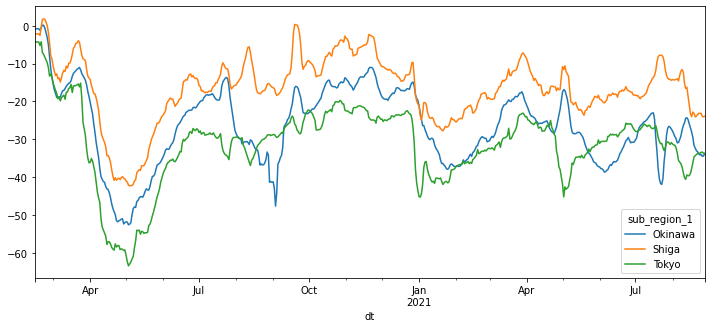

In [23]:
dfChart.plot(figsize=(12,5))

In [68]:
dfCovidPositive=pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv")
dfCovidTest   =pd.read_csv("https://www.mhlw.go.jp/content/pcr_case_daily.csv")
dfCovidTest.columns=['dt','kokuritsu_kansensho','kenekisho','hokensho','minkan_gyosei','uni','hospital','subtotal','minkan_personal','total']
dfCovidTest=dfCovidTest.drop(columns=['subtotal','total'])

dfCovidPositive = dfCovidPositive.pivot(index='Date', columns='Prefecture', values='Newly confirmed cases')

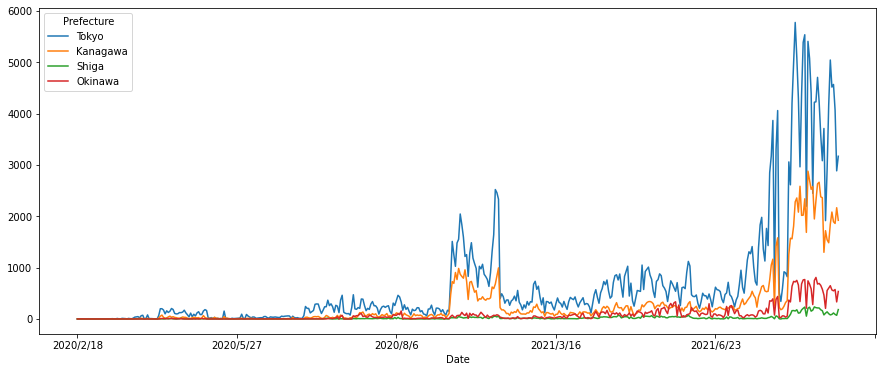

In [66]:
dfCovidPositive[dfCovidPositive.index>='2020/2/18'].loc[:, ['Tokyo','Kanagawa','Shiga','Okinawa']].plot.line(figsize=(15,6))

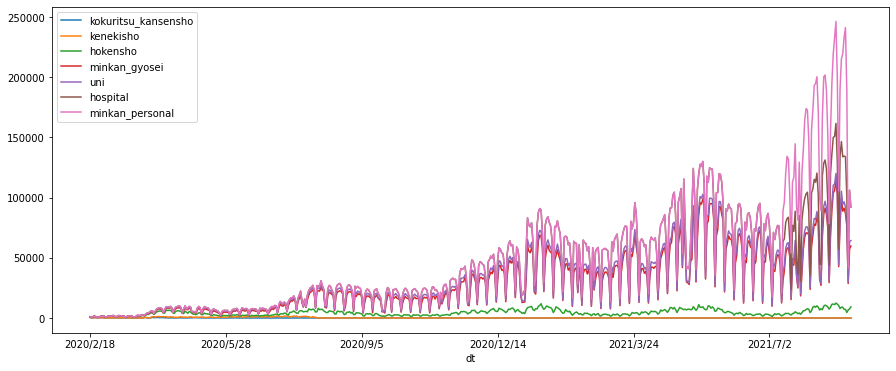

In [71]:
dfCovidTest.plot(x='dt', stacked=True, figsize=(15,6))